# Neighbors of neighbors

In this notebook, we demonstrate how neighbor-based filters work in the contexts of measurements of cells in tissues. We also determine neighbor of neighbors and extend the radius of such filters.

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib
from numpy.random import random

cle.select_device("RTX")

<GeForce RTX 2080 Ti on Platform: NVIDIA CUDA (1 refs)>

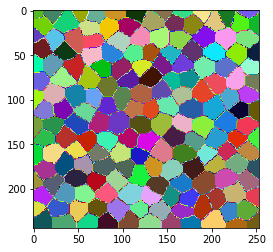

In [2]:
# Generate artificial cells as test data
tissue = cle.artificial_tissue_2d()
touch_matrix = cle.generate_touch_matrix(tissue)

cle.imshow(tissue, labels=True)

# Associate artificial measurements to the cells

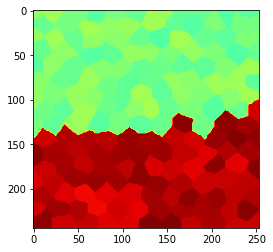

In [3]:
centroids = cle.label_centroids_to_pointlist(tissue)

coordinates = cle.pull_zyx(centroids)
values = random([coordinates.shape[1]])

for i, y in enumerate(coordinates[1]):
    if (y < 128):
        values[i] = values[i] * 10 + 45
    else:
        values[i] = values[i] * 10 + 90

measurements = cle.push_zyx(np.asarray([values]))

# visualize measurments in space
parametric_image = cle.replace_intensities(tissue, measurements)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=100, color_map='jet')

# Local averaging smoothes edges
By averaging measurments locally, we can reduce the noise, but we also introduce a stripe where the region touch

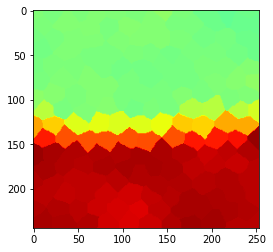

In [4]:
local_mean_measurements = cle.mean_of_touching_neighbors(measurements, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_mean_measurements)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=100, color_map='jet')

# Edge preserving filters: median
By averaging using a median filter, we can also reduce noise while keeping the edge between the regions sharp

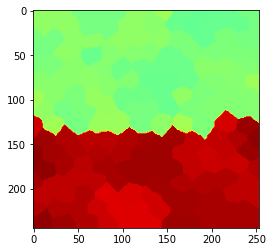

In [5]:
local_median_measurements = cle.median_of_touching_neighbors(measurements, touch_matrix)

parametric_image = cle.replace_intensities(tissue, local_median_measurements)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=100, color_map='jet')

# Increasing filter radius: neighbors of neighbors
In order to increase the radius of the operation, we need to determin neighbors of touching neighbors

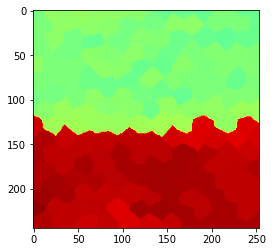

In [6]:
neighbor_matrix = cle.neighbors_of_neighbors(touch_matrix)

local_median_measurements = cle.median_of_touching_neighbors(measurements, neighbor_matrix)

parametric_image = cle.replace_intensities(tissue, local_median_measurements)
cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=100, color_map='jet')

## Short-cuts for visualisation only
If you're not so much interested in the vectors of measurements, there are shortcuts: For example for visualizing the mean value of neighboring pixels with different radii:

original


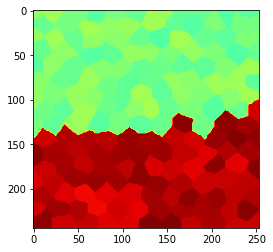

Radius 0


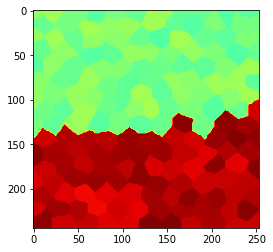

Radius 1


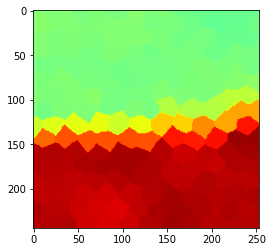

Radius 2


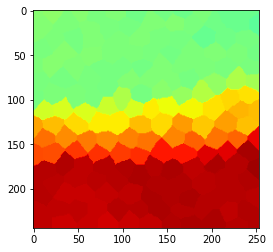

Radius 3


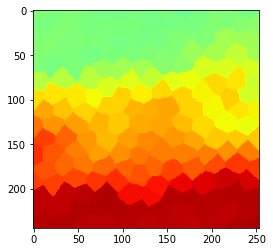

Radius 4


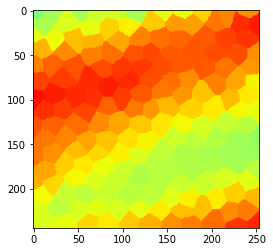

In [7]:
# visualize measurments in space
measurement_image = cle.replace_intensities(tissue, measurements)
print('original')
cle.imshow(measurement_image, min_display_intensity=0, max_display_intensity=100, color_map='jet')

for radius in range(0, 5):
    print('Radius', radius)
    # note: this function takes a parametric image the label map instead of a vector and the touch_matrix used above
    parametric_image = cle.mean_of_touching_neighbors_map(measurement_image, tissue, radius=radius)
    cle.imshow(parametric_image, min_display_intensity=0, max_display_intensity=100, color_map='jet')